# Networkx tutorial

**toc is in structure in dataspell**

## install dependencies

In [71]:
!pip install numpy matplotlib tqdm networkx -i https://pypi.tuna.tsinghua.edu.cn/simple

Traceback (most recent call last):
  File "D:\conda\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
  File "D:\conda\lib\site-packages\pip\_internal\cli\main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "D:\conda\lib\site-packages\pip\_internal\cli\autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "D:\conda\lib\site-packages\pip\_internal\cli\main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "D:\conda\lib\site-packages\pip\_internal\build_env.py", line 16, in <module>
    from pip._vendor.packaging.requirements import Requirement
  File "D:\conda\lib\site-packages\pip\_vendor\packaging\requirements.py", line 10, in <module>
    from pip._vendor.pyparsing import (  # noqa
  File "D:\conda\lib\site-packages\pip\_vendor\pyparsing\__init__.py", line 140, in <module>
    from .core import __

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

## set figure size

In [91]:
plt.figure(figsize=(5, 5))

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

## basic built in graph

### create basic graph through builtin api

In [ ]:
G = nx.complete_graph(5)
nx.draw(G)
G.size()

In [ ]:
G = nx.complete_graph(5, nx.DiGraph())
nx.draw(G)
G.size()

### karate_club_graph and les_miserables_graph classic graph

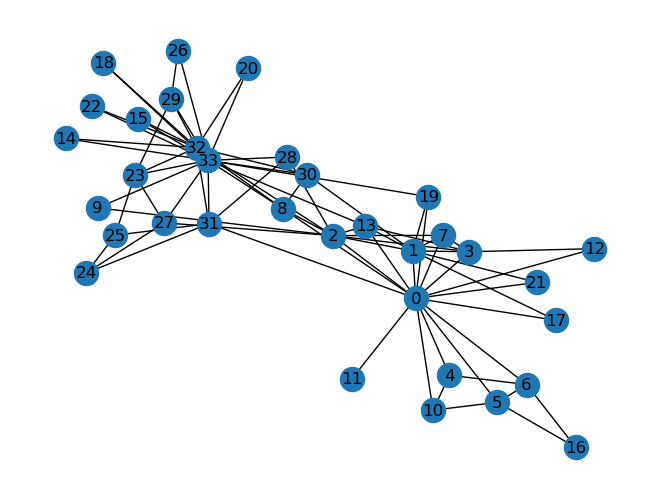

In [92]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True)

In [93]:
G.nodes[5]

{'club': 'Mr. Hi'}

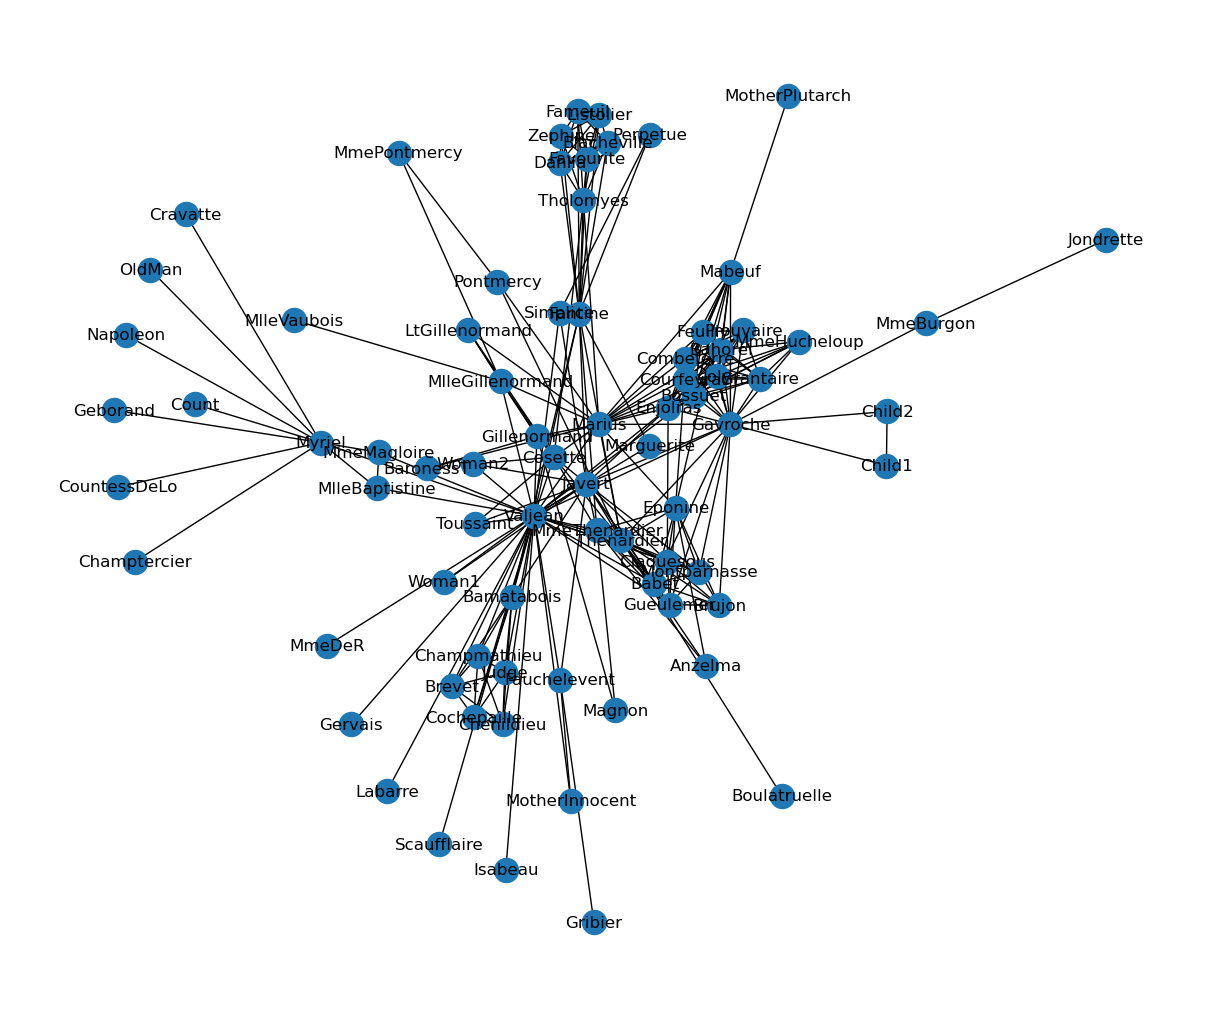

In [95]:
G = nx.les_miserables_graph()
pos = nx.spring_layout(G, seed=5)   # set seed to get same layout
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True)

## create own graph from data

### import data triples.csv

In [ ]:
df = pd.read_csv("dataset/triples.csv")
df

### put data into graph

In [ ]:
G = nx.DiGraph()
edges = [edge for edge in zip(df['head'], df['tail'])]
G.add_edges_from(edges)

In [ ]:
G.edges("关羽")

### find graph parameter

In [ ]:
print(G)

In [ ]:
len(G)

In [ ]:
G.size()

In [ ]:
G.nodes

In [ ]:
G.edges

In [ ]:
nx.draw(G)

### create adjacency matrix

In [ ]:
for line in nx.generate_adjlist(G):
    print(line)

In [ ]:
nx.write_edgelist(G, path="dataset/my_graph")

In [ ]:
H = nx.read_edgelist(path="dataset/my_graph")

In [ ]:
plt.figure(figsize=(15, 14))
pos = nx.spring_layout(H, iterations=3, seed=5)
nx.draw(H, pos)


## create graph and add graph feature

In [ ]:
G = nx.DiGraph()
G.graph["name"] = "hello"

In [ ]:
print(G)

### create node

In [ ]:
G = nx.DiGraph()

In [ ]:
G.add_node("zhuofengli")
G.add_nodes_from([("zhuofengli", {"point": "100"}), ("kim", {"point": "100"})])
G.nodes(data=True)

In [ ]:
nx.draw(G)

### add graph H to graph G

In [ ]:
H = nx.path_graph(5)
nx.draw(H)

In [ ]:
G.add_nodes_from(H)
nx.draw(G)

In [ ]:
G.add_node(H)
nx.draw(G)

### get node feature in graph

In [ ]:
G.add_node(0, feature=100)
G.add_node(1, feature=50)
G.add_node(2, feature=30)


In [ ]:
print(G.number_of_edges())
print(G.number_of_nodes())
print(G.nodes(data=True))
G.nodes[0]

### create link and get link feature

In [76]:
G.add_edge(0, 1, weight=1, light=1)
G.add_edges_from([(1, 2), (2, 0)], weight=5)

In [79]:
print(G.number_of_edges())
G.edges(data=True)

3


OutEdgeDataView([(0, 1, {'weight': 1, 'light': 1}), (1, 2, {'weight': 5}), (2, 0, {'weight': 5})])

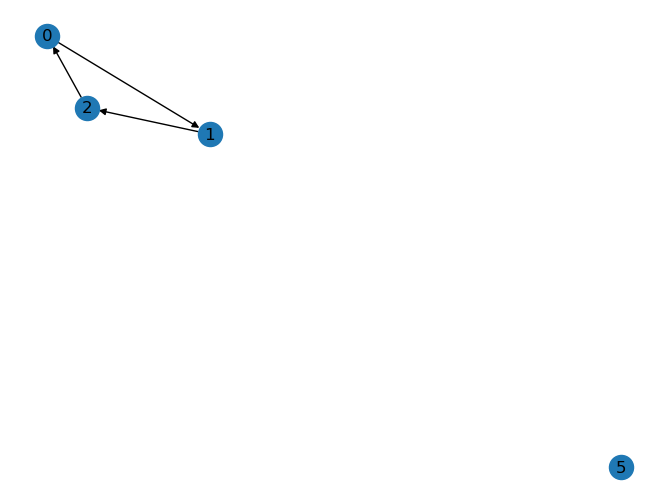

In [84]:
nx.draw(G, with_labels=True)

In [97]:
# get specific node link
G.edges(data=True)
G.edges[("0", "1")]


KeyError: '0'

In [90]:
G.degree[1]

2